# CV evaluation with lasso regression on PD datasets (within each dataset separately)

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool
import warnings
import microscope as mc
import pickle

from sklearn.metrics import classification_report


sns.set_style("white")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
base_d = "/Users/erankotler/dinamo"
data_d = os.path.join(base_d, "data/gse_data_20231002")

results_d = os.path.join(base_d, "resutls")
models_d = os.path.join(base_d, "models")


In [3]:
[d for d in os.listdir(data_d) if d.startswith("GSE")]

['GSE145361',
 'GSE111223',
 'GSE190348',
 'GSE42861',
 'GSE111942',
 'GSE87095',
 'GSE147221',
 'GSE175364',
 'GSE111629',
 'GSE121192']

In [4]:
# gse_acc = "GSE111223" # PD ~260 samps
# gse_acc = "GSE111629" # PD ~570 samps
# gse_acc = "GSE145361" # PD, ~1800 samps

In [52]:
PD_datasets = ["GSE145361","GSE111629", "GSE190348", "GSE111223"]
RA_datasets = ["GSE42861","GSE111942","GSE175364","GSE121192","GSE87095"]

In [55]:
datasets_to_analyze = RA_datasets
CV_results = {}

for gse_acc in datasets_to_analyze:
    print("Processing", gse_acc)
    gse_d = os.path.join(data_d, gse_acc)
    data = mc.Dataset(gse_d=gse_d)
    data.load_data(max_CpGs=300) 
    data.organize_data()
    
    # Examine original label names
    print("Original labels:", data.orig_label_names)
    print("Number of samples:", data.df.shape[0])
    
    cv_res = mc.cv_train_test(
        data, 
        CV = 5, # "LOO" # 10 #"LOO"
        penalty = 'l1', 
        internalCV_folds = 5)

    CV_results[gse_acc] = cv_res
    
    # save the model to disk
    out_f = os.path.join(results_d, gse_acc + "_l1_cv_res_v0.dat")
    pickle.dump(cv_res, open(out_f, 'wb'))
    print ("CV results saved to", out_f)
    print("***************************************************************************\n")



Processing GSE42861
Original labels: ['case' 'control']
Number of samples: 689
Starting cross validation
CV fold 0 Train size: 551, test size: 138 (fract positives in train: 0.599)
Starting feature selection
Ready for training, elapsed time: 0.1 sec
Fold time: 0.2 sec
CV fold 1 Train size: 551, test size: 138 (fract positives in train: 0.525)
Starting feature selection
Ready for training, elapsed time: 0.1 sec


/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold time: 18.1 sec
CV fold 2 Train size: 551, test size: 138 (fract positives in train: 0.528)
Starting feature selection
Ready for training, elapsed time: 0.1 sec
Fold time: 0.5 sec
CV fold 3 Train size: 551, test size: 138 (fract positives in train: 0.456)
Starting feature selection
Ready for training, elapsed time: 0.1 sec


/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold time: 20.3 sec
CV fold 4 Train size: 552, test size: 137 (fract positives in train: 0.462)
Starting feature selection
Ready for training, elapsed time: 0.1 sec
Fold time: 0.3 sec
CV results saved to /Users/erankotler/dinamo/resutls/GSE42861_l1_cv_res_v0.dat
***************************************************************************

Processing GSE111942
Original labels: ['case' 'control']
Number of samples: 43
Starting cross validation
CV fold 0 Train size: 34, test size: 9 (fract positives in train: 0.471)
Starting feature selection
Ready for training, elapsed time: 0.0 sec
Fold time: 0.0 sec
CV fold 1 Train size: 34, test size: 9 (fract positives in train: 0.471)
Starting feature selection
Ready for training, elapsed time: 0.0 sec
Fold time: 0.1 sec
CV fold 2 Train size: 34, test size: 9 (fract positives in train: 0.529)
Starting feature selection
Ready for training, elapsed time: 0.0 sec
Fold time: 0.1 sec
CV fold 3 Train size: 35, test size: 8 (fract positives in train: 0.714)

KeyError: "['ID_REF', 'GSM5331596.1', 'GSM5331602.1', 'GSM5331582.1', 'GSM5331591.1', 'GSM5331595.1', 'GSM5331583.1', 'GSM5331606.1'] not in index"

# HERE

GSE145361


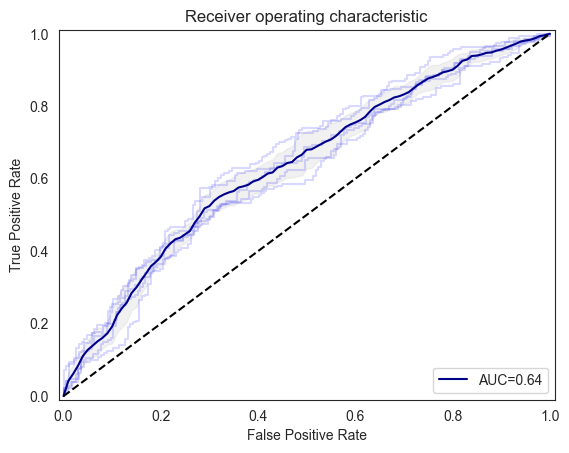

GSE111629


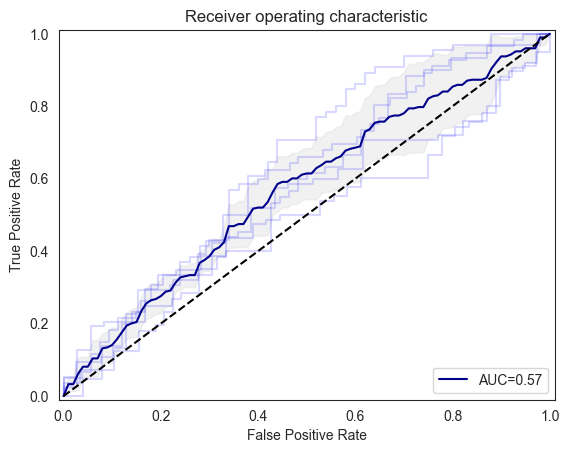

GSE190348
Cant plot ROC curve for GSE190348 (test sets don't include both labels)
GSE111223


<Figure size 640x480 with 0 Axes>

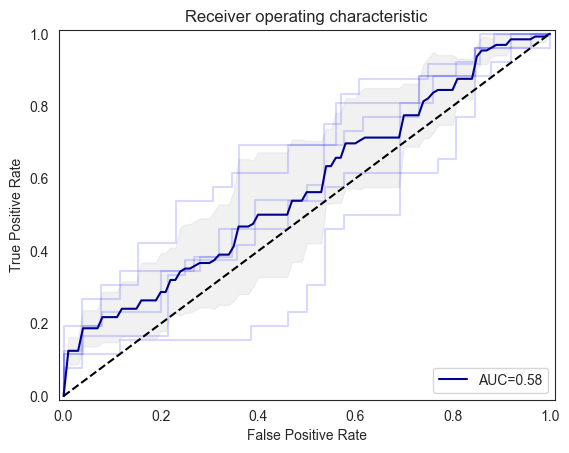

In [14]:
for gse_acc in list(CV_results.keys()):
    print(gse_acc)
    try:
        mc.plot_cv_roc(CV_results[gse_acc])
    except:
        print ("Cant plot ROC curve for %s (test sets don't include both labels)"%gse_acc)

In [51]:
THRESH = 0.5
for gse_acc in list(CV_results.keys()):
    print(gse_acc)
    print_report(cv_res=CV_results[gse_acc], THRESH=THRESH)
    print("******************************************************\n")

GSE145361
              precision    recall  f1-score   support

           0       0.60      0.13      0.22       930
           1       0.52      0.91      0.66       959

    accuracy                           0.53      1889
   macro avg       0.56      0.52      0.44      1889
weighted avg       0.56      0.53      0.44      1889

******************************************************

GSE111629
              precision    recall  f1-score   support

           0       0.42      1.00      0.59       237
           1       1.00      0.00      0.01       334

    accuracy                           0.42       571
   macro avg       0.71      0.50      0.30       571
weighted avg       0.76      0.42      0.25       571

******************************************************

GSE190348
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        16
           1       0.00      0.00      0.00        15

    accuracy                           0

/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/erankotler/miniconda3/envs/geo_cpg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [34]:
CV_results[gse_acc]["y_pred_prob"]

[array([0.31330202, 0.30540458, 0.30756022, 0.27753162, 0.30347068,
        0.29883405, 0.30413298, 0.30644629, 0.30183966, 0.29061377,
        0.27888484, 0.29301831, 0.29842187, 0.28267574, 0.29746622,
        0.29720291, 0.28004615, 0.29566448, 0.29785773, 0.30548695,
        0.309263  , 0.30006064, 0.29649906, 0.29029027, 0.28955495,
        0.29079297, 0.28969856, 0.3053909 , 0.29691321, 0.29536624,
        0.30066617, 0.28765937, 0.30039476, 0.30150547, 0.29364684,
        0.29914359, 0.29544889, 0.28512639, 0.3001868 , 0.29532784,
        0.30045681, 0.30127469, 0.30267003, 0.30183482, 0.29787676,
        0.30399844, 0.30137597, 0.30902138, 0.29503773, 0.29426774,
        0.3092534 , 0.30774294]),
 array([0.30552191, 0.30402186, 0.29623775, 0.30440499, 0.29916793,
        0.30473314, 0.30699679, 0.29334037, 0.29820011, 0.30119708,
        0.30223733, 0.30638443, 0.30253761, 0.30232031, 0.29967968,
        0.30200444, 0.30188504, 0.30007508, 0.30013015, 0.30858213,
        0.2976

In [88]:
gse_acc = "GSE175364"#"GSE111223"#
gse_d = os.path.join(data_d, gse_acc)

data = mc.Dataset(gse_d=gse_d)
data.load_data()#max_CpGs=5000) 

In [90]:
data.organize_data()
# # Examine original label names
# data.orig_label_names

['ID_REF', 'GSM5331596.1', 'GSM5331602.1', 'GSM5331582.1', 'GSM5331591.1', 'GSM5331595.1', 'GSM5331583.1', 'GSM5331606.1']


KeyError: "None of [Index(['ID_REF', 'GSM5331596.1', 'GSM5331602.1', 'GSM5331582.1',\n       'GSM5331591.1', 'GSM5331595.1', 'GSM5331583.1', 'GSM5331606.1'],\n      dtype='object', name='Sample')] are in the [index]"

In [86]:
data.groups

,Group
Sample,
GSM3025562,case
GSM3025563,control
GSM3025564,control
GSM3025565,case
GSM3025566,control
...,...
GSM3025816,control
GSM3025817,control
GSM3025818,control


In [87]:
data.y

Sample
GSM3025562    1
GSM3025563    0
GSM3025564    0
GSM3025565    1
GSM3025566    0
             ..
GSM3025816    0
GSM3025817    0
GSM3025818    0
GSM3025819    1
GSM3025820    1
Name: Group, Length: 259, dtype: int64

In [78]:
len([samp for samp in data.mat.columns if samp in data.groups.index])

78

In [79]:
len(data.mat.columns)

86

In [83]:
len(data.groups)

78

AttributeError: 'Dataset' object has no attribute 'y'

In [70]:
orig_labels = data.groups.loc[list(data.mat.columns[1:]), "Group"]

KeyError: "['GSM5331596.1', 'GSM5331602.1', 'GSM5331582.1', 'GSM5331591.1', 'GSM5331595.1', 'GSM5331583.1', 'GSM5331606.1'] not in index"

In [71]:
list(data.mat.columns[1:])

['GSM5331582',
 'GSM5331583',
 'GSM5331584',
 'GSM5331585',
 'GSM5331586',
 'GSM5331587',
 'GSM5331588',
 'GSM5331589',
 'GSM5331590',
 'GSM5331591',
 'GSM5331592',
 'GSM5331593',
 'GSM5331594',
 'GSM5331595',
 'GSM5331596',
 'GSM5331597',
 'GSM5331598',
 'GSM5331599',
 'GSM5331600',
 'GSM5331601',
 'GSM5331602',
 'GSM5331603',
 'GSM5331604',
 'GSM5331605',
 'GSM5331606',
 'GSM5331607',
 'GSM5331608',
 'GSM5331596.1',
 'GSM5331610',
 'GSM5331611',
 'GSM5331612',
 'GSM5331613',
 'GSM5331614',
 'GSM5331615',
 'GSM5331616',
 'GSM5331617',
 'GSM5331618',
 'GSM5331602.1',
 'GSM5331620',
 'GSM5331621',
 'GSM5331622',
 'GSM5331582.1',
 'GSM5331624',
 'GSM5331591.1',
 'GSM5331626',
 'GSM5331627',
 'GSM5331628',
 'GSM5331629',
 'GSM5331630',
 'GSM5331631',
 'GSM5331632',
 'GSM5331633',
 'GSM5331634',
 'GSM5331635',
 'GSM5331636',
 'GSM5331595.1',
 'GSM5331638',
 'GSM5331639',
 'GSM5331640',
 'GSM5331641',
 'GSM5331583.1',
 'GSM5331643',
 'GSM5331644',
 'GSM5331645',
 'GSM5331646',
 'GSM5331647'

In [80]:
data.groups.loc["GSM5331582"]

Group    case
Name: GSM5331582, dtype: object

In [82]:
data.mat["GSM5331582.1"]

1         0.692168
2         0.955275
3         0.926265
4         0.271542
5         0.843608
            ...   
485508    0.027659
485509    0.094949
485510    0.021394
485511    0.090538
485512    0.048741
Name: GSM5331582.1, Length: 485512, dtype: float64

In [61]:
data.mat.head()

,ID_REF,GSM5331582,GSM5331583,GSM5331584,GSM5331585,GSM5331586,GSM5331587,GSM5331588,GSM5331589,GSM5331590,...,GSM5331657,GSM5331658,GSM5331659,GSM5331660,GSM5331661,GSM5331662,GSM5331663,GSM5331606.1,GSM5331665,GSM5331666
1,cg00000029,0.468346,0.397771,0.595018,0.670596,0.610482,0.628505,0.561926,0.624297,0.706864,...,0.678617,0.464320,0.627348,0.620441,0.625389,0.586774,0.671453,0.664510,0.643165,0.538237
2,cg00000108,0.924908,0.940999,0.959333,0.952618,0.928522,0.979541,0.966476,0.962188,0.959340,...,0.975910,0.946950,0.966311,0.953847,0.970828,0.967936,0.950547,0.952200,0.936631,0.946778
3,cg00000109,0.906366,0.902909,0.864610,0.888998,0.897590,0.922957,0.881064,0.884281,0.955370,...,0.927154,0.922795,0.912452,0.885674,0.895959,0.897772,0.933922,0.862986,0.933642,0.885929
4,cg00000165,0.202452,0.216338,0.199435,0.250947,0.254762,0.240438,0.255256,0.215085,0.255314,...,0.269586,0.289041,0.276186,0.276938,0.233794,0.198920,0.305605,0.236791,0.297460,0.212332
5,cg00000236,0.835832,0.797097,0.894697,0.874233,0.845360,0.910223,0.811126,0.838421,0.898263,...,0.833440,0.803744,0.861671,0.839992,0.786930,0.851337,0.877911,0.818994,0.864263,0.849939


In [62]:
data.groups.head()

,Group
Sample,
GSM5331582,case
GSM5331583,case
GSM5331584,case
GSM5331585,case
GSM5331586,case


In [60]:
data.organize_data()

KeyError: "['ID_REF', 'GSM5331596.1', 'GSM5331602.1', 'GSM5331582.1', 'GSM5331591.1', 'GSM5331595.1', 'GSM5331583.1', 'GSM5331606.1'] not in index"

In [59]:
data.groups

,Group
Sample,
GSM5331582,case
GSM5331583,case
GSM5331584,case
GSM5331585,case
GSM5331586,case
...,...
GSM5331661,case
GSM5331662,case
GSM5331663,case


In [ ]:
data.df.shape

In [ ]:
data.df

#### Load second dataset:

In [ ]:
gse_acc2 = "GSE145361" # PD, ~1800 samps
gse_d2 = os.path.join(data_d, gse_acc2)

In [ ]:
data2 = mc.Dataset(gse_d=gse_d2)
data2.load_data()#max_CpGs=5000) 
data2.organize_data()

# Examine original label names
data2.orig_label_names

In [ ]:
data2.df.shape

In [ ]:
# save the model to disk
models_d = os.path.join(base_d, "models")
out_f = os.path.join(models_d, gse_acc + "_model_v0.dat")
pickle.dump(all_data_model, open(out_f, 'wb'))
print ("Model saved to", out_f)

# HERE

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       237
           1       0.80      0.83      0.81       334

    accuracy                           0.78       571
   macro avg       0.77      0.77      0.77       571
weighted avg       0.78      0.78      0.78       571



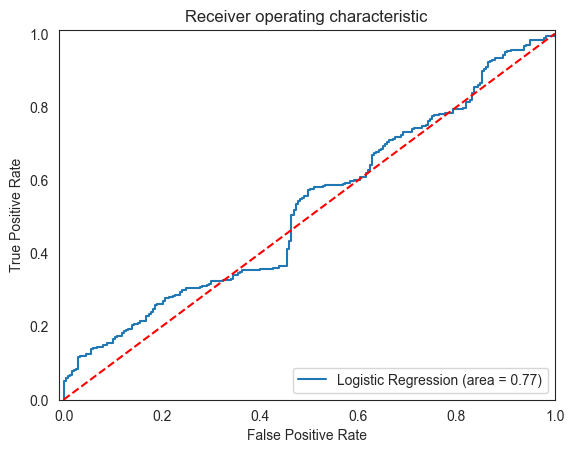

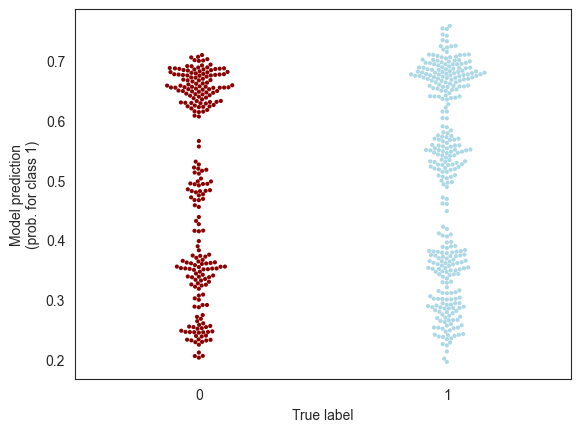

In [132]:
print(classification_report(y, y_pred))

helper.plot_roc_curve(y, y_pred, preds_prob, out_f=None)

sns.swarmplot(x=y, y=preds_prob, size=3, palette=["darkred","lightblue"])
plt.xlabel("True label")
plt.ylabel("Model prediction\n(prob. for class 1)")
plt.show()

In [166]:
# Regularization lambdas across models (lower=stronger regularization):
Cs = pd.DataFrame([m.C_ for m in models], columns=["C"])
Cs["C"].value_counts()

C
2.782559     3
35.938137    2
Name: count, dtype: int64